<a href="https://colab.research.google.com/github/chaos44/signate_competition/blob/main/ames_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/mchatham/ames-housing-regression/comments

In [5]:
!git clone https://github.com/chaos44/signate_competition

Cloning into 'signate_competition'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 24 (delta 2), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [6]:
cd signate_competition/ams_beginner/

/content/signate_competition/ams_beginner


In [7]:
ls

data_description.txt  sample_submit.csv  test.csv  train.csv


## データ確認

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')

In [10]:
print(train.shape)
print(test.shape)

(3000, 47)
(2000, 46)


In [11]:
test['SalePrice'] = np.nan
df = pd.concat([train, test], axis=0)
train_ids = train['index']
test_ids = test['index']

In [12]:
df.head()

,index,Order,MS SubClass,MS Zoning,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Exter Qual,Foundation,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,200,2163,20,RL,9000,Reg,Lvl,Inside,NAmes,1Fam,1Story,5,5,1963,1950,Gable,VinylSd,VinylSd,TA,CBlock,554.725259,490.862838,620.339061,Ex,Y,SBrkr,941,0,2358,1.001999,2,0,3,1,TA,5,0,1.998003,381.014258,Y,0,0,7,2007,WD,Normal,158000.0
1,3832,1862,20,RL,9600,Reg,Lvl,Inside,CollgCr,1Fam,1Story,7,5,2006,2006,Gable,VinylSd,VinylSd,Gd,PConc,514.217911,1711.943709,1286.011022,Ex,Y,SBrkr,894,0,1040,0.002000,2,0,3,1,Gd,6,0,1.998003,384.114652,Y,0,0,11,2007,WD,Normal,145000.0
2,4927,754,20,RL,9600,Reg,Lvl,Inside,NridgHt,1Fam,1Story,9,5,2007,2007,Hip,VinylSd,VinylSd,Gd,PConc,1596.991227,511.217197,1341.741207,Ex,Y,SBrkr,864,0,864,1.001999,2,0,3,1,Gd,7,1,2.998015,625.140330,Y,0,0,5,2008,WD,Normal,125000.0
3,4088,641,80,RL,9600,Reg,Lvl,Inside,OldTown,1Fam,SLvl,6,6,1976,1950,Gable,VinylSd,Plywood,TA,CBlock,586.182353,469.685845,566.069609,Gd,Y,SBrkr,864,0,864,0.002000,1,0,3,1,TA,6,0,0.998002,193.156275,Y,0,0,7,2006,WD,Normal,135000.0
4,3644,754,20,RL,9600,Reg,Lvl,Inside,NoRidge,1Fam,1Story,7,5,1994,2002,Gable,VinylSd,VinylSd,Gd,PConc,1589.946047,484.337352,1258.013116,Ex,Y,SBrkr,832,0,1040,1.001998,2,0,3,1,Gd,7,1,2.998012,617.903766,Y,0,0,7,2007,WD,Normal,175000.0


In [13]:
df.shape

(5000, 47)

In [14]:
print('Data from years {} to {}.'.format(df['Yr Sold'].min(), df['Yr Sold'].max()))

Data from years 2006 to 2010.



Some info about Ames, Iowa

    Population: 66,191 in 2016, in the top ten for the state of Iowa.
    Density: 2,436/mi2

    Major employers: State/federal agencies
    Ranked in the top 15 "Cities that have done the best since the recession" by Bloomberg
    Unemployment: Ranked along with Boulder, CO as lowest unemployment rate in 2016.

Ames is a moderately-sized town smack-dab in the middle of Iowa, containing Iowa State University (ISU) and nestled between the state's major east-west and north-south highways. ISU employs almost 16,000 of the states 66,00 residents. The Iowa DoT is located in the city. Finally, Ames sees a lot of political activity by virtue of its being in Iowa. According to Wikipedia, the Ames Straw Poll was held in the city from 1979 through 2011 before being cancelled.

In [15]:
sns.set()
df.columns

Index(['index', 'Order', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Foundation', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice'],
      dtype='object')

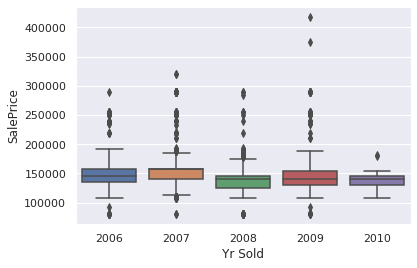

In [16]:
sns.boxplot(x=df['Yr Sold'], y=df['SalePrice'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


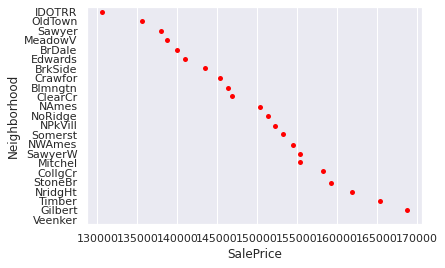

In [17]:
data = pd.concat(
    [
        df.groupby('Neighborhood').mean()['SalePrice'],
        df.groupby('Neighborhood').count()['index']
    ], 
    
    axis=1)
f, ax = plt.subplots()
sns.stripplot(data.sort_values(by='SalePrice').SalePrice, data.sort_values(by='SalePrice').index, orient='h', color='red');
# sns.stripplot(data.sort_values(by='Id').Id, data.sort_values(by='Id').index, orient='h', color='red')

Interestingly, I see four clusters of neighborhoods above.

    Neighborhood 1: MeadowV:BrDale
    Neighborhood 2: BrkSide:Mitchel
    Neighborhood 3: SawyerW:Veenker
    Neighborhood 4: Timber:NoRidge


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


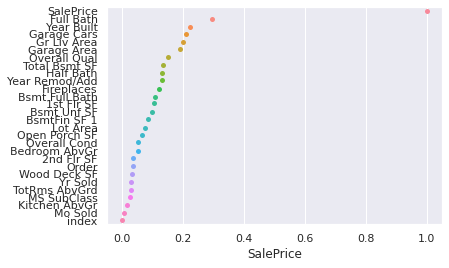

In [18]:
sorted_corrs = df.corr()['SalePrice'].apply(np.abs).sort_values(ascending=False)
sns.stripplot(sorted_corrs, sorted_corrs.index, orient='h');

In [22]:
from sklearn. preprocessing import LabelEncoder

categories = df.columns[df.dtypes == "object"]
categories

Index(['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Foundation', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Paved Drive', 'Sale Type',
       'Sale Condition'],
      dtype='object')

In [23]:
for cat in categories: 
    le = LabelEncoder() 
    print(cat) 
    if df[cat].dtypes == "object": 
        le = le. fit(df[cat])
        df[cat] = le.transform(df[cat])

MS Zoning
Lot Shape
Land Contour
Lot Config
Neighborhood
Bldg Type
House Style
Roof Style
Exterior 1st
Exterior 2nd
Exter Qual
Foundation
Heating QC
Central Air
Electrical
Kitchen Qual
Paved Drive
Sale Type
Sale Condition


In [25]:
train_df_le = df[~df["SalePrice"].isnull()]
test_df_le = df[df["SalePrice"].isnull()] 

In [36]:
import lightgbm as lgb

In [27]:
from sklearn.model_selection import KFold 
folds = 3 
kf = KFold(n_splits = folds)

In [28]:
lgbm_params = { "objective" :"regression", "random_SEED" : 1234 }

In [34]:
train_X = train_df_le.drop(["SalePrice", "index", "Order"], axis = 1) 
train_Y = train_df_le["SalePrice"]

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
models = []
rmses = []
oof = np.zeros(len(train_X)) 
for train_index, val_index in kf.split(train_X): 
    X_train = train_X. iloc[train_index]
    X_valid = train_X. iloc[val_index] 
    y_train = train_Y.iloc[train_index] 
    y_valid = train_Y.iloc[val_index] 
    lgb_train = lgb.Dataset(X_train, y_train) 
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) 
    model_lgb = lgb.train(lgbm_params, lgb_train, valid_sets = lgb_eval, num_boost_round = 100, early_stopping_rounds = 20, verbose_eval = 10, ) 
    y_pred = model_lgb. predict(X_valid, num_iteration = model_lgb. best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred))) 
    print(tmp_rmse) 
    models.append(model_lgb) 
    rmses.append(tmp_rmse) 
    oof[val_index] = y_pred

Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 8.57549e+08
[20]	valid_0's l2: 8.29565e+08
[30]	valid_0's l2: 8.3132e+08
[40]	valid_0's l2: 8.31604e+08
Early stopping, best iteration is:
[26]	valid_0's l2: 8.27461e+08
0.17166258041175814
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 6.5764e+08
[20]	valid_0's l2: 6.42391e+08
[30]	valid_0's l2: 6.51741e+08
[40]	valid_0's l2: 6.5934e+08
Early stopping, best iteration is:
[20]	valid_0's l2: 6.42391e+08
0.15409882377914308
Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 9.25361e+08
[20]	valid_0's l2: 9.09891e+08
[30]	valid_0's l2: 9.20146e+08
Early stopping, best iteration is:
[19]	valid_0's l2: 9.08741e+08
0.17343034287461978


In [41]:
test_X = test_df_le.drop(["SalePrice", "Order", "index"], axis = 1)
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)
    
test_df_le['pred_1'] = preds[0]
test_df_le['pred_2'] = preds[1]
test_df_le['pred_3'] = preds[2]

test_df_le.to_csv("./test_pred.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand